# Part 3 - Finding Point of Interests

In addition to geocoding addresses, the geocoding service can also be used to find points of interest (POI) of several different kinds. In Part 3, we will explain briefly about `category` parameter of `geocode()` function and its applications.

## Getting started

First, Let's look at some Quickstart examples, which show how the `category` attributes change based on the search string.

### Search for administrative place names

The `geocode()` method supports single field and multi-field searches for administrative place names. This includes searches for neighborhoods, cities, counties, states, provinces, or countries. If a search for a city name results in multiple matches with the same name, the World Geocoding Service will sort the candidates in order of their relative importance to each other (as indicated by the value of the Rank output field), with priority generally based on population and capital status. 

For example, there are many cities in the world named `Liverpool`, so a search for "Liverpool" results in several equivalent matches; `Liverpool, UK` will always be the top candidate since it has the greatest population.

In [1]:
from arcgis.geocoding import geocode
from arcgis.gis import GIS

In [2]:
gis = GIS("portal url", "username", "password")

In [7]:
address = "Liverpool"


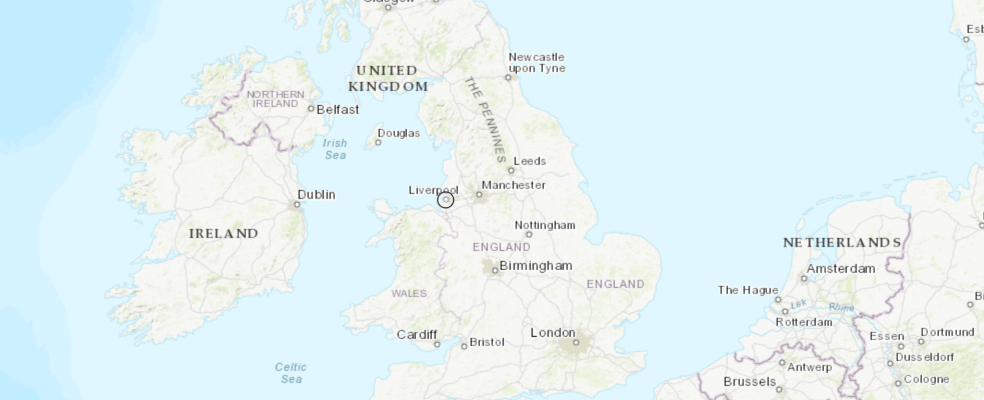

In [11]:
map1 = gis.map("United Kingdom", 6)
map1

In [9]:
liverpool = geocode(address)[0]

In [10]:
map1.draw(liverpool['location'])

However, rank alone is not always enough to distinguish between administrative places. Also, you may not necessarily want to find the highest-ranked feature for a particular search. It may be necessary to remove ambiguity by refining searches with additional information. For example, a search for `Liverpool` returns `Liverpool, UK` as the top candidate based on rank. If you instead want to find the town of Liverpool, New York, it is necessary to add the state information to the search.

In [15]:
address = {
    "Address" : "Liverpool",
    "Region" : "NY"
}


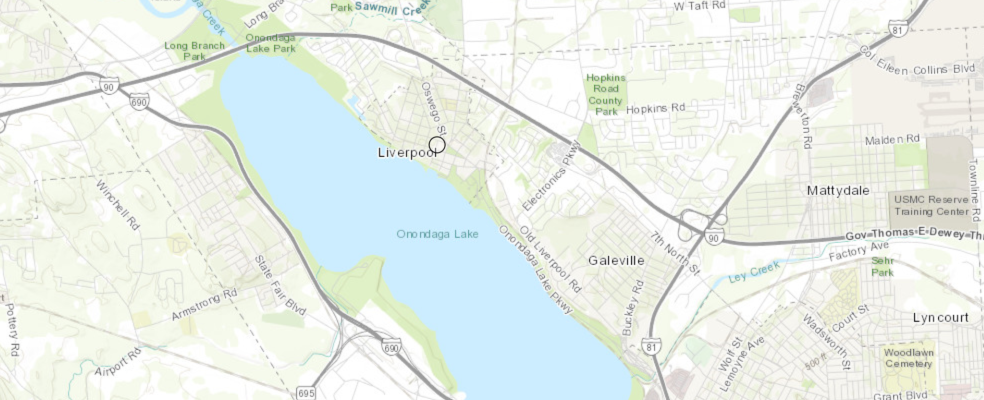

In [22]:
map2 = gis.map("Onondaga County, New York, United States")
map2

In [20]:
liverpool = geocode(address)[0]
map2.draw(liverpool['location'])

### Example of finding landmarks

The `geocode()` method can be used to find famous landmarks. The example below geocodes and maps Mt. Everest in Asia, Eiffel Tower in Europe, and the Statue of Liberty in North America:

In [29]:
landmarks = ["Mt. Everest", "Eiffel Tower", "Statue of Liberty"]


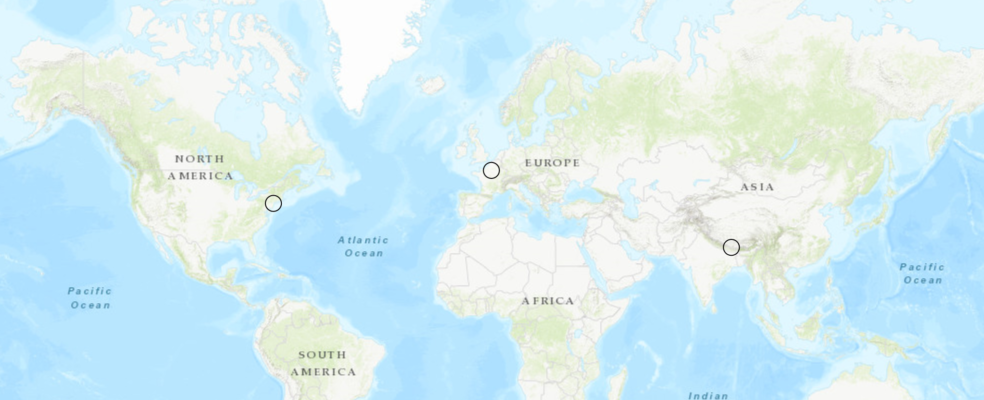

In [34]:
map4 = gis.map()
map4

In [33]:
for lm in landmarks:
    lm_res = geocode(lm)[0]
    map4.draw(lm_res['location'])

### Search for postal codes

The `geocode()` method supports searches for postal codes and postal code extensions. When searching for postal codes, it is important to note that the same code can be valid in more than one country. For the best results, it may be necessary to include additional information with the postal code, such as city or country.

In [23]:
address = {
    "Postal" : 110001,
    "CountryCode" : "India"
}


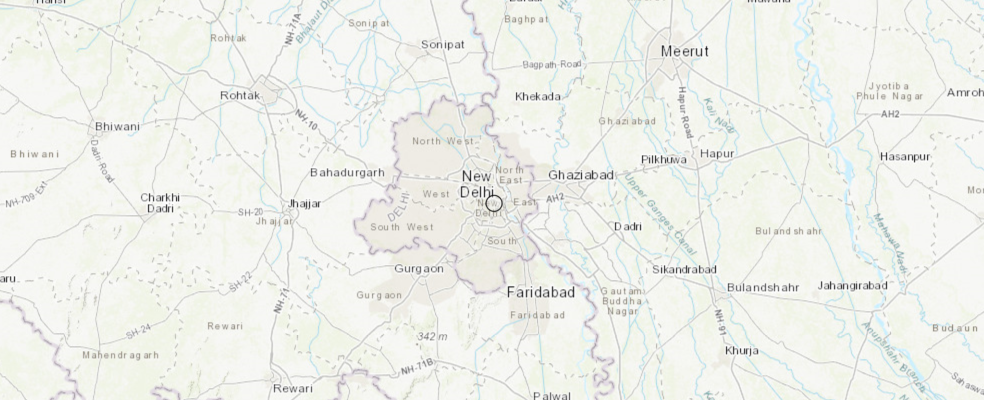

In [27]:
map3 = gis.map("New Delhi, India")
map3

In [25]:
pincode = geocode(address)[0]
map3.draw(pincode['location'])

The matched address contains several attributes that provide values for the various output fields supported by the geocoder, as listed below:

In [26]:
pincode['attributes']

{'Loc_name': 'World',
 'Status': 'M',
 'Score': 100,
 'Match_addr': '110001',
 'LongLabel': '110001, New Delhi, Delhi, IND',
 'ShortLabel': '110001',
 'Addr_type': 'Postal',
 'Type': '',
 'PlaceName': '110001',
 'Place_addr': 'New Delhi, Delhi, 110001',
 'Phone': '',
 'URL': '',
 'Rank': 5,
 'AddBldg': '',
 'AddNum': '',
 'AddNumFrom': '',
 'AddNumTo': '',
 'AddRange': '',
 'Side': '',
 'StPreDir': '',
 'StPreType': '',
 'StName': '',
 'StType': '',
 'StDir': '',
 'BldgType': '',
 'BldgName': '',
 'LevelType': '',
 'LevelName': '',
 'UnitType': '',
 'UnitName': '',
 'SubAddr': '',
 'StAddr': '',
 'Block': '',
 'Sector': '',
 'Nbrhd': '',
 'District': '',
 'City': 'New Delhi',
 'MetroArea': '',
 'Subregion': 'New Delhi',
 'Region': 'Delhi',
 'RegionAbbr': 'DL',
 'Territory': '',
 'Zone': '',
 'Postal': '110001',
 'PostalExt': '',
 'Country': 'IND',
 'LangCode': 'ENG',
 'Distance': 0,
 'X': 77.22255833300005,
 'Y': 28.623410000000035,
 'DisplayX': 77.22255833300005,
 'DisplayY': 28.62341

<div class="inner_cell">
    <div class="text_cell_render border-box-sizing rendered_html">
        <blockquote>
            <p>Note that if users want to get exact administrative boundaries, they can do so by using geoenrichment as shown <a href="https://developers.arcgis.com/python/guide/part3-where-to-enrich-named-stat-areas/#Geographic-level:-Zip-Code">here</a>.</p>
        </blockquote>
    </div>
</div>

### Example of finding multiple categories 

In the example below, we search for Indian and Thai Food in Los Angeles, and plot their locations using different symbols based on the `Type` attribute:

In [35]:
categories = "Indian Food, Thai Food"


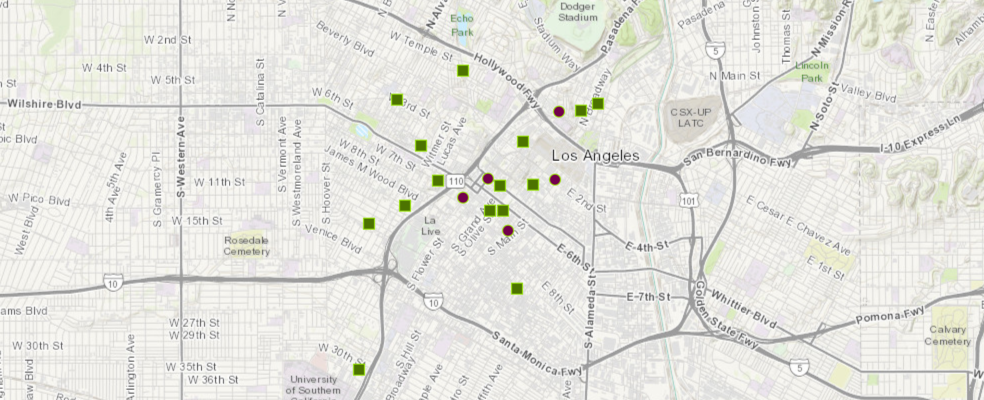

In [47]:
dtla = geocode("Downtown, Los Angeles, CA")[0]

map5 = gis.map(dtla)
map5

In [41]:
# find and plot up to 100 Indian and Thai restaurants in DTLA
restaurants = geocode(None, dtla['extent'], category=categories, max_locations=100)

In [46]:
thai_symbol = {
"type": "esriSMS",
 "style": "esriSMSSquare",
 "color": [76,115,0,255],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

indian_symbol = {
"type": "esriSMS",
 "style": "esriSMSCircle",
 "color": [115,0,76,255],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

for restaurant in restaurants:
    popup = { 
    "title" : restaurant['address'], 
    "content" : "Phone: " + restaurant['attributes']['Phone']
        }
    if restaurant['attributes']['Type'] == 'Thai Food':
        map5.draw(restaurant['location'], popup, thai_symbol) # use a green square symbol for Thai food
    else:
        map5.draw(restaurant['location'], popup, indian_symbol)

### Example of finding restaurants within a polygon drawn on map

In the example above, we have learned to search for restaurants in downtown LA. Next we will design a call-back method that could get the geometry of the drawn sketch entered by user and use it as the customized `search_extent` for the `geocode()` method.


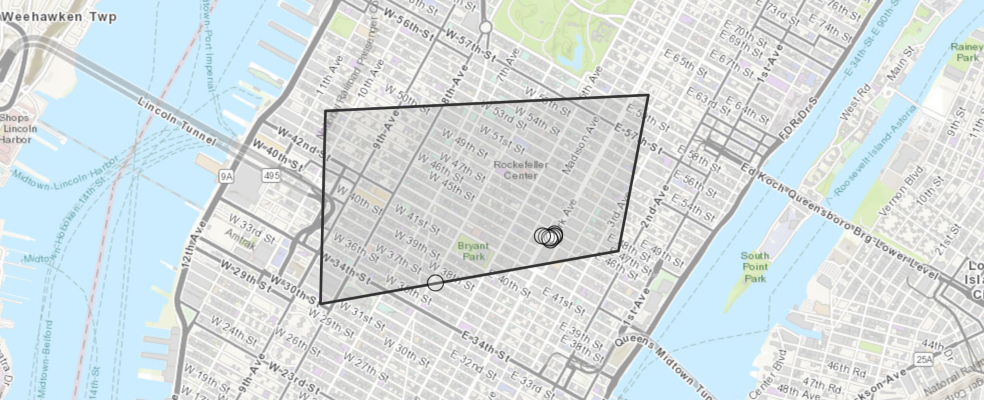

In [7]:
map6 = gis.map()
map6.extent = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'xmin': -8235706.664189668,
                 'ymin': 4977993.551288029,
                 'xmax': -8233351.448255569,
                 'ymax': 4978949.014141619}
map6

```
Searching within the area of drawn polygon...
{'xmin': -8237203.157884028, 'ymin': 4975541.833547482, 'xmax': -8234069.23972434, 'ymax': 4977544.483455284, 'spatialReference': {'latestWkid': 3857, 'wkid': 102100}}
Paris Baguette
Melt Bakery
Farmstand
Liquiteria
Sushi Express
Playa Bowls
Ovenly
Starbucks
Toby's Estate Coffee
Sushi On Jones
```

In [4]:
from arcgis.geometry import Polygon, project, Geometry

In [5]:
# Define the callback function that search within the area.
drawn_polygon = None

def find_restaurants(map1, g):
    global drawn_polygon
    drawn_polygon = g
    
    print("Searching within the area of drawn polygon...")
    search_area = Polygon(g)
    search_area_extent = { 'xmin': search_area.extent[0],
                           'ymin': search_area.extent[1],
                           'xmax': search_area.extent[2],
                           'ymax': search_area.extent[3],
                           'spatialReference': {'latestWkid': 3857, 'wkid': 102100}}
    print(search_area_extent)
    
    restaurants = geocode(None, search_extent=search_area_extent, category="Food", max_locations=10)
    for restaurant in restaurants:
        popup = { 
                    "title" : restaurant['address'], 
                    "content" : "Phone: " + restaurant['attributes']['Phone']
                }
        map1.draw(restaurant['location'], popup)
        print(restaurant['address'])

# Set as the callback function to be invoked when a polygon is drawn on the map
map6.on_draw_end(find_restaurants)

In [6]:
# Either use the geometry defined below
"""
search_area_dict = {'type': 'Polygon', 'coordinates': [[[-73.95949251594702, 40.763214654993785], 
                                                    [-73.97567231593547, 40.74551709428493], 
                                                    [-74.00064117977167, 40.76103030464491],
                                                    [-73.95949251594702, 40.763214654993785]]]}

search_area = Geometry(search_area_dict)
"""
# Or draw your own polygon
map6.draw("polygon")

### Example of finding hospitals within 10 mile buffer around Esri HQ and distance to each

Next, let's walk through the example of finding hospitals within a 10-mile buffer around Esri Headquarter (HQ) and computing distances from Esri to each hospital. The steps of implementation in this section would include:

 - Creating a Point object for Esri HQ, use the `geometry` module to build a `buffer`, and then applying it as `search_extent` parameter.
 - Getting `geocode()` results as a `FeatureSet`, iterating through each feature within, and using `distance()` to compute the distance from the original `Point` to the feature.
 - Presenting results as a `DataFrame` showing different columns along with distance, and plotting the distance as a bar chart.
 - Plotting the `FeatureSet` on the map with appropriate symbols (using the <a href="http://esri.github.io/arcgis-python-api/tools/symbol.html">Python symbol picker</a> for this, or programmatically create these symbols).
 
#### Step 1. Create a Point object for Esri HQ, and build a buffer

In [243]:
esrihq_fset = geocode("Esri", as_featureset=True)
esrihq_fset

<FeatureSet> 20 features

In [245]:
esri_geom = esrihq_fset.features[0]
esri_geom.geometry.JSON

'{"type": "Point", "coordinates": [-117.19569523299998, 34.05608640000003]}'

In [248]:
from arcgis.features import Feature, FeatureSet
from arcgis.geometry import buffer

In [283]:
esri_buffer = buffer([esri_geom.geometry], 
                     in_sr = 102100, buffer_sr=102100,
                     distances=0.1, unit=9001)[0]

esri_buffer_f = Feature(geometry=esri_buffer)
esri_buffer_fset = FeatureSet([esri_buffer_f])
esri_buffer_fset

<FeatureSet> 1 features

In [294]:
# need to change the `type` from `MultiPolygon` to `Polygon`
esri_buffer_f_geom_dict = {"type": "Polygon", 
                           "coordinates":  esri_buffer_f.geometry.coordinates().tolist()}

#### Step 2. Geocode and compute distance


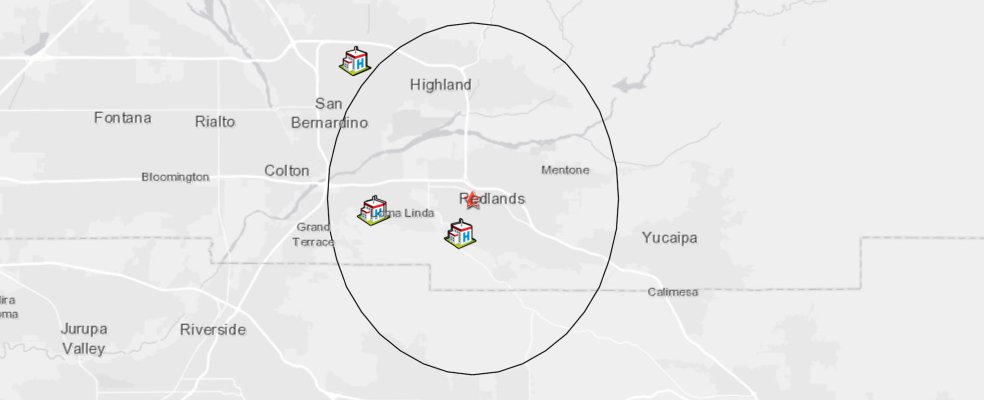

In [373]:
map7 = gis.map("Redlands, CA")
map7.basemap='gray'
map7

In [306]:
esri_buffer_geom = Geometry(esri_buffer_f_geom_dict)
esri_buffer_geom.extent

(-117.29569523299998,
 33.956086400000025,
 -117.09569523299999,
 34.15608640000003)

In [370]:
fill_symbol = {"type": "esriSFS",
               "style": "esriSFSNull",
               "outline":{"color": [0,0,0,255]}}
map7.draw(esri_buffer_geom, symbol=fill_symbol)

In [371]:
house_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                "url":"http://static.arcgis.com/images/Symbols/Shapes/RedStarLargeB.png",
                "contentType":"image/png","width":24,"height":24}
map7.draw(esri_geom.geometry, symbol=house_symbol)

In [350]:
search_area_extent = { 'xmin': esri_buffer_geom.extent[0],
                       'ymin': esri_buffer_geom.extent[1],
                       'xmax': esri_buffer_geom.extent[2],
                       'ymax': esri_buffer_geom.extent[3],
                       'spatialReference': {'latestWkid': 4326, 'wkid': 102100}}

hospitals = geocode('hospital', search_extent=search_area_extent, max_locations=50)
len(hospitals)

6

In [351]:
hospital_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                   "url":"http://static.arcgis.com/images/Symbols/SafetyHealth/Hospital.png",
                   "contentType":"image/png","width":24,"height":24}

In [372]:
neighborhood_data_dict = {}
neighborhood_data_dict['hospitals'] = []

for place in hospitals:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    map7.draw(place['location'], symbol=hospital_symbol, popup=popup)
    neighborhood_data_dict['hospitals'].append(place['attributes']['PlaceName'])

In [326]:
for place in hospitals:
    print(place["location"])

{'x': -117.27639997720607, 'y': 34.13462000447212, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.27727999322025, 'y': 34.13429000894418, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.20487003505623, 'y': 34.036959959461214, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.2044000617453, 'y': 34.03624003779764, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.2632400167344, 'y': 34.049760036643725, 'type': 'point', 'spatialReference': {'wkid': 4326}}
{'x': -117.26472994994006, 'y': 34.04951998167821, 'type': 'point', 'spatialReference': {'wkid': 4326}}


In [328]:
from arcgis.geometry import Point, distance

neighborhood_data_dict['distance'] = []

for place in hospitals:
    dis = distance(      spatial_ref=4326, 
                         geometry1=Point(place["location"]), 
                         geometry2=esri_geom.geometry, 
                         geodesic=False, 
                         gis=gis)
    neighborhood_data_dict['distance'].append(dis['distance'])

#### Step 3. Present results in tables and bar charts

Note: The distance column is to displayed in units of 100 miles.

In [329]:
import pandas as pd
neighborhood_df = pd.DataFrame.from_dict(neighborhood_data_dict, orient='index')
neighborhood_df = neighborhood_df.transpose()
neighborhood_df

hospitals   distance
0        Dignity Health St Bernardine Medical Center   0.112609
1     Dignity Health St Bernardine Medical Center-ER   0.113013
2                        Redlands Community Hospital  0.0212131
3                     Redlands Community Hospital-ER  0.0216715
4  Loma Linda University Health Loma Linda Univer...  0.0678404
5  Loma Linda University Health Loma Linda Univer...  0.0693463

The bar plot below displays the real address on the x-axis for each entry of hospitals on the x-axis.

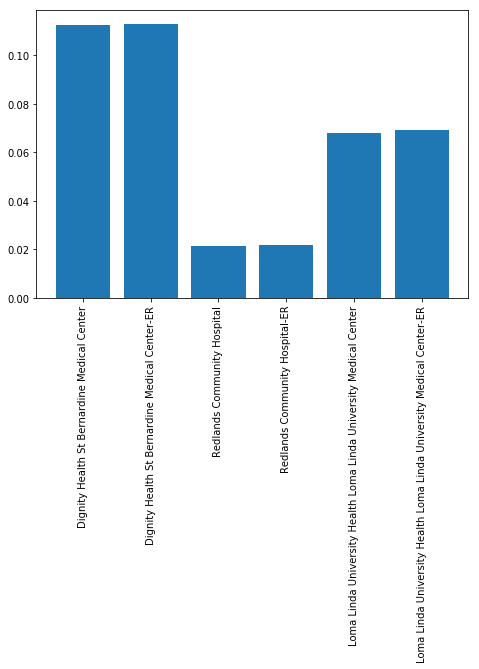

In [339]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
addrs = neighborhood_data_dict["hospitals"]
scores = neighborhood_data_dict["distance"]
ax.bar(addrs,scores)
plt.xticks(rotation=90)
plt.show()

## Finding POIs using category filtering

We have seen selective examples with the `category` parameter being used in the `geocode()` function above. The steps below show the users how to get the list of all categories the geocoder knows and some usage examples:

### Get a list of available categories and sub-categories with the current geocoder

In [206]:
from arcgis.geocoding import get_geocoders
geocoder = get_geocoders(gis)[0]

In [212]:
def list_categories(obj, depth = 0):
    for category in obj['categories']:
        print('\t'*depth  + category['name'])
        if 'categories' in category:
            list_categories(category, depth + 1)
            
list_categories(geocoder.properties)

Address
	Subaddress
	Point Address
	Street Address
	Distance Marker
	Intersection
	Street Name
Postal
	Primary Postal
	Postal Locality
	Postal Extension
Coordinate System
	LatLong
	XY
	YX
	MGRS
	USNG
Populated Place
	Block
	Sector
	Neighborhood
	District
	City
	Metro Area
	Subregion
	Region
	Territory
	Country
	Zone
POI
	Arts and Entertainment
		Amusement Park
		Aquarium
		Art Gallery
		Art Museum
		Billiards
		Bowling Alley
		Casino
		Cinema
		Historical Monument
		History Museum
		Indoor Sports
		Jazz Club
		Landmark
		Live Music
		Museum
		Other Arts and Entertainment
		Performing Arts
		Ruin
		Science Museum
		Tourist Attraction
		Wild Animal Park
		Zoo
	Education
		College
		Fine Arts School
		Other Education
		School
		Vocational School
	Food
		African Food
		American Food
		Argentinean Food
		Australian Food
		Austrian Food
		Bakery
		Balkan Food
		BBQ and Southern Food
		Belgian Food
		Bistro
		Brazilian Food
		Breakfast
		Brewpub
		British Isles Food
		Burgers
		Cajun and Creo

###  An example of finding restaurants around a given location

Now let us find restaurants near Time Square (with a maximum of returned results set to 100, since there are way too many restaurants in the specified location).


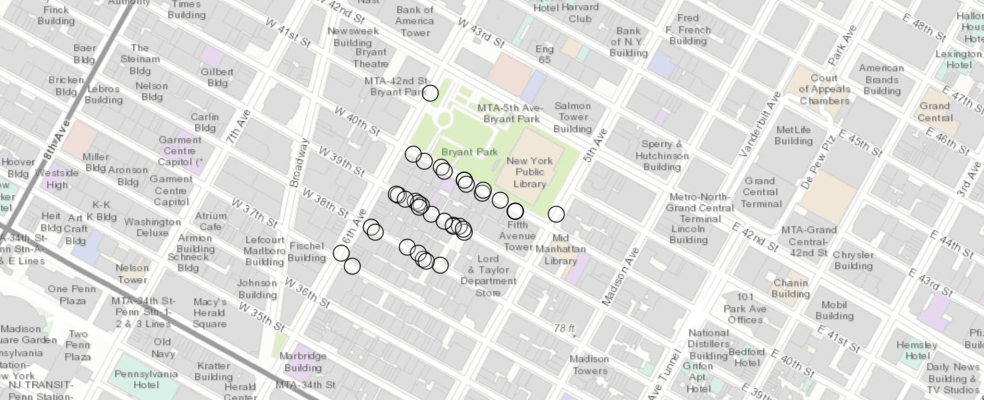

In [237]:
time_square = geocode("Time Square, NYC")[0]

map8 = gis.map(time_square)
map8

In [217]:
restaurants = geocode(None, time_square['extent'], category="Food", max_locations=100)
for restaurant in restaurants:
    popup = { 
                "title" : restaurant['address'], 
                "content" : "Phone: " + restaurant['attributes']['Phone']
            }
    map8.draw(restaurant['location'], popup)

### How to refine the results by sub-category 

Still using the last request to search for restaurants near Time Square, we will further refine the search by sub-categories, e.g. Indian, Chinese, Burgers, Thai.. etc.

The `category` parameter is used to specify a place or address type which can be used to filter results. The parameter supports input of `single category values` or `multiple comma-separated values`. Its usage (shown below) is applicable for all other categories that have sub-categories, besides food. For instance, `Education` would include `College`, `Fine Arts School`, `Other Education`, `School` and `Vocational School`. For more categories and sub-categories, please refer to <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocoding-category-filtering.htm#GUID-20D9858C-C27C-4C9C-BE4C-1EDB36E04D62">API Reference</a>.


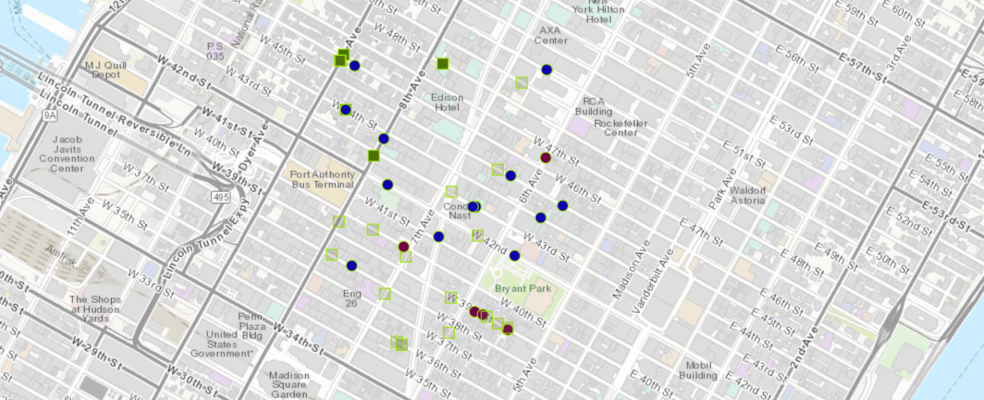

In [236]:
map9 = gis.map(time_square)
map9

In [223]:
categories = "Indian Food, Chinese Food, Burgers, Thai Food"

In [224]:
chinese_symbol = {
"type": "esriSMS",
 "style": "esriSMSSquare",
 "color": [115,100,76,55],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

burgers_symbol = {
"type": "esriSMS",
 "style": "esriSMSCircle",
 "color": [15,0,176,255],
 "size": 8,
 "angle": 0,
 "xoffset": 0,
 "yoffset": 0,
 "outline": 
  {
  "color": [152,230,0,255],
   "width": 1
  }
}

In [226]:
restaurants = geocode(None, time_square['extent'], category=categories, max_locations=100)

for restaurant in restaurants:
    popup = { 
                "title" : restaurant['address'], 
                "content" : "Phone: " + restaurant['attributes']['Phone']
            }
    if restaurant['attributes']['Type'] == 'Thai Food':
        map9.draw(restaurant['location'], popup, thai_symbol) # green square
    elif restaurant['attributes']['Type'] == 'Indian Food':
        map9.draw(restaurant['location'], popup, indian_symbol) # dark red circle
    elif restaurant['attributes']['Type'] == 'Chinese Food':
        map9.draw(restaurant['location'], popup, chinese_symbol) # mint square
    else:
        map9.draw(restaurant['location'], popup, burgers_symbol) # blue circle

### Example of finding gas stations, bars, and other facilities near a given location

The example below showcases how to find gas stations, bars, libraries, schools, parks, and grocery stores around a given location, based on the previous sample in which we look for hospitals near Esri Headquarter.

#### Step 1. Create symbols for facilities

(You can get your symbols using this online <a href="http://esri.github.io/arcgis-python-api/tools/symbol.html">tool</a>.)

In [340]:
symbols = {"groceries": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                         "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Shopping.png",
                         "contentType":"image/png","width":12,"height":12},
          "coffee": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                     "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Coffee.png",
                     "contentType":"image/png","width":12,"height":12},
          "restaurant": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                         "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Dining.png",
                         "contentType":"image/png","width":12,"height":12},
          "bar": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                  "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Bar.png",
                  "contentType":"image/png","width":12,"height":12},
          "gas": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                  "url":"http://static.arcgis.com/images/Symbols/Transportation/esriBusinessMarker_72.png",
                  "contentType":"image/png","width":12,"height":12},
          "park": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                      "url":"http://static.arcgis.com/images/Symbols/OutdoorRecreation/RestArea.png",
                      "contentType":"image/png","width":10,"height":10},
          "school": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                     "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Note.png",
                     "contentType":"image/png","width":10,"height":10},
          "library": {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                      "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/LiveShow.png",
                      "contentType":"image/png","width":12,"height":12}}

In [346]:
list(symbols.keys()) 

['groceries',
 'coffee',
 'restaurant',
 'bar',
 'gas',
 'park',
 'school',
 'library']

#### Step 2. Define your own geocode function

Next, let's define a function to use the ArcGIS Geocoding service in search of facilities around the Esri Headquarter, based on the kind of facilities (e.g. groceries) you are looking for:

In [357]:
def search_and_map(in_map, kind="groceries"):
    per_kind = geocode(kind, search_extent=search_area_extent, 
                       max_locations=20, as_featureset=True)
    neighborhood_data_dict[kind] = []

    for place in per_kind:
        popup={"title" : place.attributes['PlaceName'], 
               "content" : place.attributes['Place_addr']}
        in_map.draw(place.geometry, symbol=symbols[kind], popup=popup)
        neighborhood_data_dict[kind].append(place.attributes['PlaceName'])

Now, we are ready to loop through the list of facility types and perform geocoding for each kind, then map the results with the customized symbols:


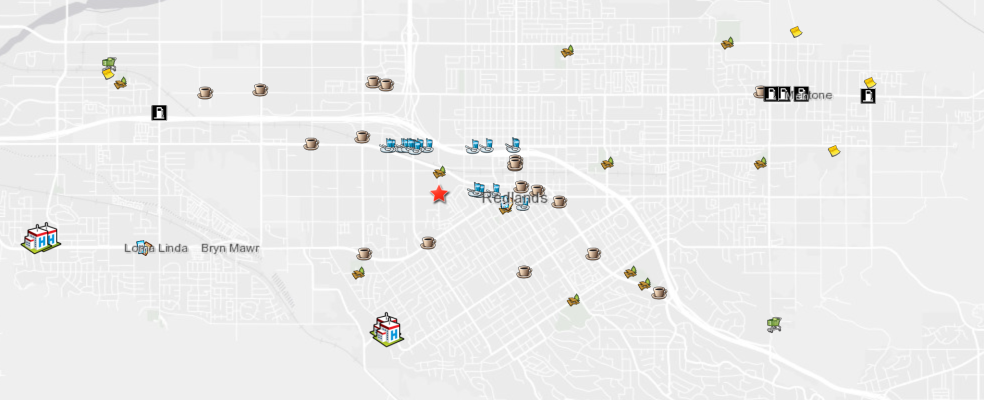

In [366]:
map7.zoom = 13
map7

In [358]:
for kind in list(symbols.keys()) :
    search_and_map(map7, kind)

#### Step 3. Tabularize the results

Last but not least, let's present the results in a table:

In [367]:
neighborhood_df = pd.DataFrame.from_dict(neighborhood_data_dict, orient='index')
neighborhood_df = neighborhood_df.transpose()
neighborhood_df

hospitals  \
0         Dignity Health St Bernardine Medical Center   
1      Dignity Health St Bernardine Medical Center-ER   
2                         Redlands Community Hospital   
3                      Redlands Community Hospital-ER   
4   Loma Linda University Health Loma Linda Univer...   
5   Loma Linda University Health Loma Linda Univer...   
6                                                None   
7                                                None   
8                                                None   
9                                                None   
10                                               None   
11                                               None   
12                                               None   
13                                               None   
14                                               None   
15                                               None   
16                                               None   
17                                               None   
18                                               None   
19                                               None   

                           groceries                      coffee  \
0                   Greenspot Market                   Starbucks   
1                       Trader Joe's                   Starbucks   
2                    Cookie's Market                   Starbucks   
3                      Todd's Market                   Starbucks   
4              Los Altos Meat Market               Chaca Tea Bar   
5      Jane's Natural Foods & Spices                   Starbucks   
6        La Canasta Clearance Center                   Starbucks   
7                       Rocky Market                    MR. Taco   
8                    Del Rosa Market                   Post Cafe   
9                        Stater Bros       Stell Coffee & Tea Co   
10                   Super Mini Mart                      C Cafe   
11                  Rio Ranch Market                   Starbucks   
12          LFC & Family Fish Market                   Starbucks   
13  Fresh & Easy Neighborhood Market  The Coffee Bean & Tea Leaf   
14            Hiep Thanh Supermarket        Augie's Coffee House   
15           96 Cents Discount Store         Greater Good Coffee   
16                    Grace's Market         Wild Goose Roasters   
17                Shop Rite 3 Market                   Starbucks   
18         Genus Home Care Inc of SB                   Starbucks   
19                       Stater Bros                DCH Roasters   

                          restaurant   bar       gas  \
0                    Antonious Pizza  None  Circle K   
1                Grasshopper Express  None      ARCO   
2                     Huicho's Tacos  None    Valero   
3                  La Costa Mariscos  None        76   
4                     New York Pizza  None    Valero   
5   Saverino's Italian Deli & Market  None    Valero   
6                    Breakfast Shack  None      ARCO   
7                      Mu Restaurant  None    Valero   
8                        Dhat Island  None   Chevron   
9                          Pizza Hut  None    Valero   
10                     El Pollo Loco  None     Shell   
11                Original Mona Lisa  None     Exxon   
12                        El Burrito  None    Valero   
13                           Baker's  None  7-Eleven   
14                            COCO'S  None  Circle K   
15                         Carl's Jr  None     Mobil   
16                            Arby's  None     Shell   
17                         Taco Bell  None     Mobil   
18                       Papa John's  None     Mobil   
19                            SUBWAY  None        76   

                             park                            school  \
0                   Victoria Park         Mentone Elementary School   
1                Meadowbrook Park           Valley Star High School   
2   San Bernardino Soccer C

Text(0.5, 1.0, 'Facilities within 10 miles of Esri')

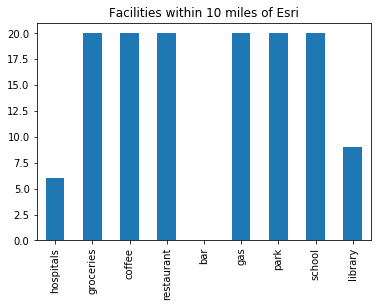

In [368]:
neighborhood_df.count().plot(kind='bar')
plt.title('Facilities within 10 miles of Esri')

## Conclusions

In Part 3, we have walked through different user scenarios using the `category` parameter within the `geocode()` function to search and filter geocoded results. In the last scenario, because home buyers often look for access to facilities, such as groceries, restaurants, schools, emergency, and health care, near prospective neighborhoods when shortlisting properties, we used the `geocoding` module to search for these facilities, build a table for each property, and map the deliverables.